In [1]:
import os
from google.colab import output
from google.colab import drive

using_colab = True

if using_colab:
    drive.mount('/content/drive')
    # %cd /content/drive/Othercomputers/My MacBook Pro/22Spring/CPSC 552/deep_learning_project

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/RRC-60.zip /content
!cd /content
!jar xf RRC-60.zip

In [3]:
!cp /content/drive/MyDrive/archive.zip /content
!cd /content
!jar xf archive.zip

In [3]:
!cp /content/drive/MyDrive/lfw-deepfunneled.zip /content
!cd /content
!jar xf lfw-deepfunneled.zip

In [4]:
!rm -rf data
!mkdir data
!mkdir data/coin
!mkdir data/face
!mv RRC-60/Observe/ data/coin
!mv archive/coins/ data/coin
!mv lfw-deepfunneled/ data/face

In [1]:
%run /content/drive/Othercomputers/My\ MacBook\ Pro/22Spring/CPSC\ 552/deep_learning_project/main.py

cuda
Epoch 0: Loss 1.121543049812317
Epoch 1: Loss 1.0453732013702393
Epoch 2: Loss 0.9607235789299011
Epoch 3: Loss 1.18070650100708
Epoch 4: Loss 1.0173282623291016
Epoch 5: Loss 1.033568024635315
Epoch 6: Loss 1.0098944902420044
Epoch 7: Loss 0.978656530380249
Epoch 8: Loss 1.0368421077728271
Epoch 9: Loss 1.0684829950332642


In [2]:
save_path = '/content/drive/Othercomputers/My MacBook Pro/22Spring/CPSC 552/deep_learning_project/model.pth'
torch.save(model.state_dict(), save_path)

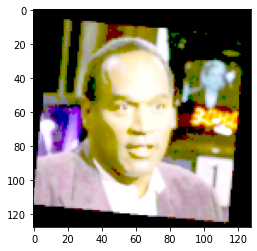

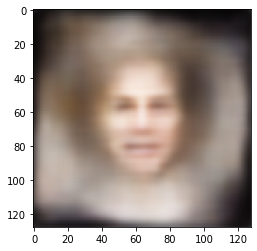

In [9]:
# test_path = 'archive/coins/data/test'
test_path = 'lfw-deepfunneled'
# test_path = 'RRC-60/Observe/'
dataset_test = datasets.ImageFolder(test_path, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

model.eval()
with torch.no_grad():
    images, labels = next(iter(test_loader))
    plt.figure()
    plt.imshow(images[0].permute(1, 2, 0).squeeze())
    plt.show()
    plt.imshow(model(images.to(device))[0][0].permute(1, 2, 0).detach().cpu().squeeze())
    plt.show()

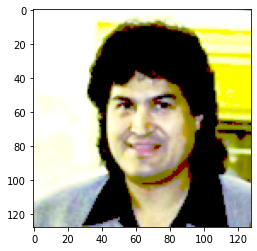

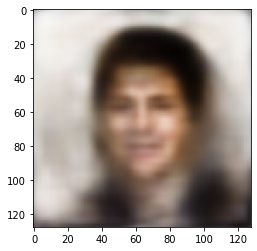

In [49]:
model.eval()
with torch.no_grad():
    images, labels = next(iter(train_loader))
    plt.figure()
    plt.imshow(images[0].permute(1, 2, 0).squeeze())
    plt.show()
    plt.imshow(model(images.to(device))[0][0].permute(1, 2, 0).detach().cpu().squeeze())
    plt.show()

In [26]:
model2 = ConVAE()
model2.load_state_dict(torch.load(save_path))
model2 = model2.to(device)
model2.eval()

ConVAE(
  (encConv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (encConv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (encConv3): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (encFC1): Linear(in_features=8192, out_features=64, bias=True)
  (encFC2): Linear(in_features=8192, out_features=64, bias=True)
  (decFC1): Linear(in_features=64, out_features=8192, bias=True)
  (decConv3): ConvTranspose2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (decConv2): ConvTranspose2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (decConv1): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsampling): Upsample(scale_factor=2.0, mode=nearest)
)

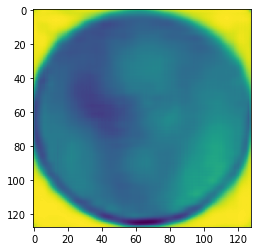

In [40]:
model2.eval()
with torch.no_grad():
    # sample = torch.randn(16, 3, 127, 127).to(device)
    # sample = model(sample)[0].cpu()
    sample = 1 * torch.randn(16, 64).to(device)
    sample = model2.decoder(sample).cpu()
    plt.figure()
    plt.imshow(sample[0].permute(1, 2, 0).squeeze())

In [ ]:
images.shape

torch.Size([16, 1, 128, 128])

In [ ]:
model.size2

In [ ]:
model.size3

In [ ]:
model.training

In [ ]:
model.train()

In [ ]:
model

In [ ]:
images, labels = next(iter(train_loader))

TypeError: ignored

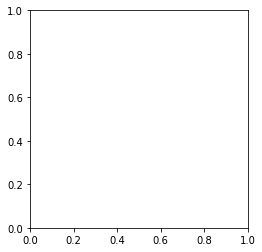

In [ ]:
plt.imshow(images[0].permute(1, 2, 0))

In [ ]:
!nvidia-smi

Wed May  4 15:30:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |   1816MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
transform = transforms.Compose([transforms.Resize(128),
                                transforms.CenterCrop(128),
                                ImgPrep(),
                                transforms.ToTensor(),
                                ])
data1_path = 'RRC-60/'
dataset1 = datasets.ImageFolder(data1_path, transform=transform)
data_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=dataset1.__len__(), shuffle=True)

data2_path = 'lfw-deepfunneled/'
dataset2 = datasets.ImageFolder(data2_path, transform=transform)
data_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=dataset2.__len__(), shuffle=True)

In [ ]:
imgs1, _ = next(iter(data_loader1))
imgs1 = imgs1.to(device)
model2.eval()
mu1, logvar1 = model2.encoder(imgs1)

RuntimeError: ignored

In [51]:
!mv data /content/drive/MyDrive/